<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Pipeline_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
# Based on https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
import random
from sklearn.model_selection import train_test_split

#Pipeline Experiment

In [2]:
# Genera una lista de 20 números aleatorios entre 1 y 20
numeros_x1 = [random.randint(1, 20) for _ in range(20)]
numeros_x2 = [random.randint(1, 20) for _ in range(20)]

# Calcula los valores de "y" utilizando la función y = (x^3 + x*3)
valores_y = [(x**3 + x*3) for x in numeros_x2]

# Crea un DataFrame con las columnas "x" y "y"
df = pd.DataFrame({'X1':numeros_x1, 'X2':numeros_x2, 'y':valores_y})
df


,X1,X2,y
0,3,20,8060
1,18,20,8060
2,4,8,536
3,8,6,234
4,3,12,1764
5,15,1,4
6,16,12,1764
7,6,16,4144
8,9,12,1764
9,9,19,6916


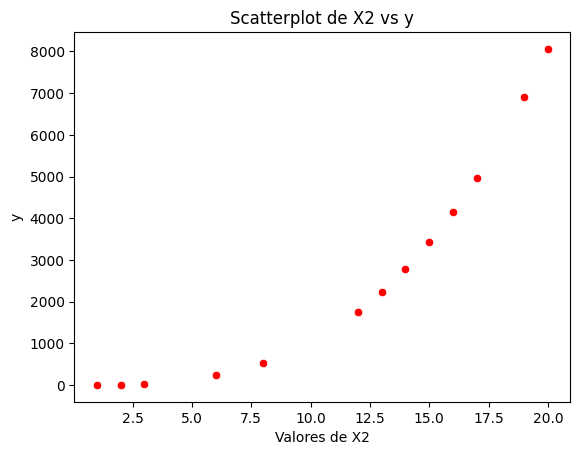

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['X2'], y=df['y'], color='red')
plt.title('Scatterplot de X2 vs y')
plt.xlabel('Valores de X2')
plt.ylabel('y')
plt.show()

In [4]:
# Separamos en train y test

train_X, test_X, train_y, test_y = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.3, random_state=42)
test_X

,X1,X2
0,3,20
17,15,3
15,12,20
1,18,20
8,9,12
5,15,1


In [5]:
#  verificacmos si la regresión lineal puede predecir correctamente

m1 = LinearRegression()
fit1 = m1.fit(train_X, train_y)
preds = fit1.predict(test_X)
print(f"\n{preds}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds))}\n")


[ 5559.15416491  -720.28147159  5470.07037677  5410.68118469
  2600.6321482  -1445.06467775]
RMSE: 1972.8388591611497



In [6]:
# Creamos una clase transformadora

#__init__: este es el constructor. Se llama cuando se inicializa el pipeline.
#fit(): Se llama cuando hacemos fit en el pipeline.
#transform(): se llama cuando usamos fit o transform en el pipeline

class ExperimentalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    print('\n>>>>>>>init() called.\n')

  def fit(self, X, y = None):
    print('\n>>>>>>>fit() called.\n')
    return self

  def transform(self, X, y = None):
    print('\n>>>>>>>transform() called.\n')
    X_ = X.copy() # creamos una copia para evitar cambios en el conjunto de datos original
    X_.X2 = X_.X2 ** 3 + X_.X2 * 3
    return X_

In [7]:
# sin transformación de entrada - para validar que obtenemos los mismos resultados que antes


print("create pipeline 1")
pipe1 = Pipeline(steps=[
                       ('linear_model', LinearRegression())
])

print("fit pipeline 1")
pipe1.fit(train_X, train_y)

print("predict via pipeline 1")
preds1 = pipe1.predict(test_X)

print(f"\n{preds1}")  # should be [13.72113586 16.93334467]
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds1))}\n")

create pipeline 1
fit pipeline 1
predict via pipeline 1

[ 5559.15416491  -720.28147159  5470.07037677  5410.68118469
  2600.6321482  -1445.06467775]
RMSE: 1972.8388591611497



In [8]:
# con transformation de entradas

print("create pipeline 2")
pipe2 = Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()),    # esto dispara una llamda a __init__
                       ('linear_model', LinearRegression())
])

# una sintaxis alternativa y más corta para hacer lo anterior, sin nombrar cada paso, es:
#pipe2 = make_pipeline(ExperimentalTransformer(), LinearRegression())

print("fit pipeline 2")
pipe2.fit(train_X, train_y)

print("predict via pipeline 2")
preds2 = pipe2.predict(test_X)

print(f"\n{preds2}")  # should be [14. 17.]
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds2))}\n")



# a. __init__ se llama cuando inicializamos pipe2.

# b. fit() y transform() se llaman cuando llamamos fit() con los datos de entrenamiento.
# Esto es necesario para transformar las características de entrada mientras se intenta predecir train_y.

# c. transform() se llama  cuando usamos predict(test_X): las características de prueba de entrada deben tener raíz cuadrada y duplicarse también antes de hacer predicciones.

create pipeline 2

>>>>>>>init() called.

fit pipeline 2

>>>>>>>fit() called.


>>>>>>>transform() called.

predict via pipeline 2

>>>>>>>transform() called.


[8.060e+03 3.600e+01 8.060e+03 8.060e+03 1.764e+03 4.000e+00]
RMSE: 9.93148172439289e-13

